In [ ]:
Introduction

Breast cancer is a widely occurring cancer in women worldwide and is related to high mortality. 
We are taking into account in this project is Invasive Ductal Carcinoma (IDC), since it is the most common subtype of all breast cancers.
Accurately identifying and categorizing breast cancer subtypes is an important clinical task, 
and automated methods can be used to save time and reduce error.

What does our job consists of? 

We will use Machine Learning methods to classify benign and malignant Invasive Ductal Carcinoma from histopathology images.

Interest

This topic was especially in our interest because in this case, machine learning algorithm and their performance
can be used directly to influence a person's life. We are especially interested in how can machines improve people's life
by improving diagnosis in terms of accuracy and time. These two elements are esential when it comes to life-threataning diseases like cancer
and a faster diagnosis, like for example capturing cancer on the early stages, has a higher possibilty of saving the patient's life.
There is still a lot of work to be done in making accurate, precise machine learning algorithm that can be used in the field of Medicine 
and we believe that paying close attention to these problems and trying to improve the algorithms day after day, might really be 
life-changing for humans and humankind.

In [ ]:
Dataset

The dataset comes from a 2016 study - "Deep learning for digital pathology image analysis: A comprehensive tutorial with selected use cases" by Andrew Janowczyk and Anant Madabhushi. 
Their study focused on several tasks, one of which was IDC clasification, for which they had an F-score of 0.7648 on 50k testing patches.

The dataset we're working with is derived from 279 patients, each of which has a unique ID. Each patient has a dedicated folder, named by their ID, with two subfolders - 0 and 1. 
The folder named 0 consists of images of benign tissue samples (those without IDC markers). 
The folder named 1 consists of images of malignant tissue samples (those containing IDC markers).

Histopathology images are large, and very small features and markers are present, which is why the images were brokend down into patches, 50x50 pixels in size. 
Each patient, therefore, has many image patches, that together would comprise entire images.
Each patch has a distinct name format - uxXyYclassC.png, where u is the patient's ID, x is the X-coordinate from which the patch was extracted, 
y is the Y-coordinate from which the patch was extracted and the class is either 0 or 1, denoting whether IDC markers are present or not in that patch


In [ ]:
from IPython import display
display.Image("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/download\ \(3\).png")

In [75]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 133 kB 1.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from glob import glob
import csv
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from numpy.random import permutation
from matplotlib.colors import ListedColormap
from PIL import Image
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()
import keras.backend as K

In [ ]:
Firstly, we upload the dataset. 
Secondly, we think a good idea to start this project is to apply exploratory data methods in order to become
more familiar with the chosen dataset.

In [2]:
data = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive")

Figure(432x288)


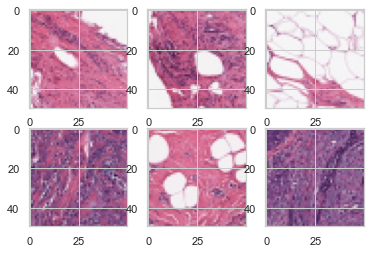

In [129]:

img1_0 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/0/8863_idx5_x101_y1251_class0.png')
img2_0 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/0/8863_idx5_x101_y1301_class0.png')
img3_0 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/0/8863_idx5_x151_y1151_class0.png')
img1_1 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/1/8863_idx5_x1551_y951_class1.png')
img2_1 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/1/8863_idx5_x1001_y801_class1.png')
img3_1 = Image.open('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/1/8863_idx5_x1001_y1501_class1.png')


f, ax = plt.subplots(2,3)
ax[0,0].imshow(img1_0)
ax[0,1].imshow(img2_0)
ax[1,0].imshow(img1_1)
ax[1,1].imshow(img2_1)
ax[0,2].imshow(img3_0)
ax[1,2].imshow(img3_1)

print(f)

In [130]:
patient_8863 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863")
patient_8863_0 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/0")
patient_8863_1 = os.listdir("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/1")


In [131]:
print(patient_8863_0[0])

8863_idx5_x1251_y2101_class0.png


In [132]:
df_0 = pd.DataFrame()
listOfFiles = [patient_8863_0, patient_8863_1]
idxNumber = 0
for i in listOfFiles:
    for path in i:
        split = path.split('_')
        patient_id = split[0]
        x_coord = split[2][1:]
        y_coord = split[3][1:]
        idc_class = split[4][5]
        
        data = {"index": [idxNumber],
                "patient_id": [patient_id],
                "idc_class": [idc_class],
                "x_coord": [x_coord],
                "y_coord": [y_coord],
                "path": ["/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/8863/"+ idc_class + "/"+path]}
        data_df = pd.DataFrame(data)
        idxNumber += 1
        df_0 = pd.concat([df_0, data_df])
        
df_8863 = df_0.set_index("index")

In [133]:
df_8863

,patient_id,idc_class,x_coord,y_coord,path
index,,,,,
0,8863,0,1251,2101,/Users/carolina/Documents/Semester_8/Introduct...
1,8863,0,501,1801,/Users/carolina/Documents/Semester_8/Introduct...
2,8863,0,351,1351,/Users/carolina/Documents/Semester_8/Introduct...
3,8863,0,1501,451,/Users/carolina/Documents/Semester_8/Introduct...
4,8863,0,2001,251,/Users/carolina/Documents/Semester_8/Introduct...
...,...,...,...,...,...
974,8863,1,1201,1451,/Users/carolina/Documents/Semester_8/Introduct...
975,8863,1,1351,1701,/Users/carolina/Documents/Semester_8/Introduct...
976,8863,1,1351,1001,/Users/carolina/Documents/Semester_8/Introduct...


In [134]:
df_8863['x_coord'] = df_8863['x_coord'].astype('int')
df_8863['y_coord'] = df_8863['y_coord'].astype('int')
df_8863['idc_class'] = df_8863['idc_class'].astype('int')

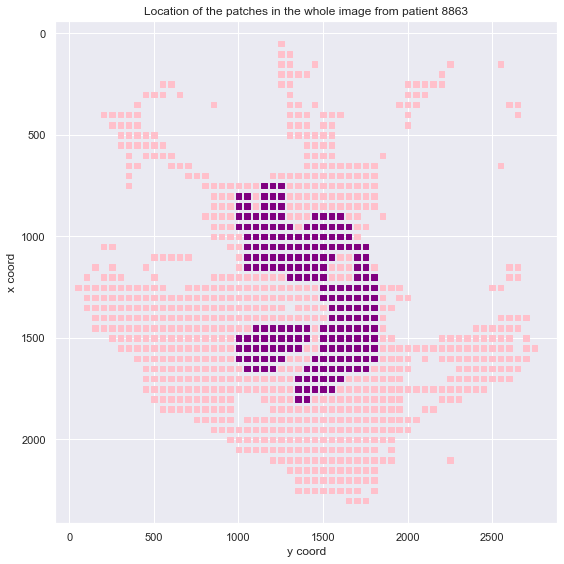

In [227]:
colors = ['pink', 'purple']
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x = df_8863['x_coord'], y=df_8863['y_coord'], c=df_8863['idc_class'],cmap=ListedColormap(colors), s=30, marker='s')
ax.set_title("Location of the patches in the whole image from patient 8863")
ax.set_xlabel("y coord")
ax.set_ylabel("x coord")
ax.invert_yaxis()
#ax.set_ylim(bottom=0)
plt.show()

In [139]:
max_point = [df_8863['x_coord'].max(), df_8863['y_coord'].max()]

grid = 255*np.ones(shape = (max_point[1] + 50, max_point[0] + 50, 3)).astype(np.uint8)
mask = 255*np.ones(shape = (max_point[1] + 50, max_point[0] + 50, 3)).astype(np.uint8)

In [140]:
for i in range(len(df_8863)):
        # Get image and label
    OldImage = cv2.imread(df_8863['path'][i])
    idc_class = df_8863['idc_class'][i]
        
    dim = (50, 50)
        
    image = cv2.resize(OldImage, dim, interpolation = cv2.INTER_AREA)
        # Extract X and Y coordinates
    x_coord = df_8863['x_coord'][i]
    y_coord = df_8863['y_coord'][i]
        # Add 50 pixels to find ending boundary for each image
    x_end = x_coord + 50
    y_end = y_coord + 50
        
        
        # `grid` will then contain each patch's image values encoded into the grid
    grid[y_coord:y_end, x_coord:x_end] = image
        
        # If `idc_class` is `1`, change the RED channel of the `mask` to 255 (intense red)
        # and other channels to `0` (remove color info, leaving just red)
    if idc_class == 1:
        mask[y_coord:y_end, x_coord:x_end, 0] = 255
        mask[y_coord:y_end, x_coord:x_end, 1:] = 0

Text(0.5, 1.0, 'Cancer tissue in the breast tissue of patient 8863')

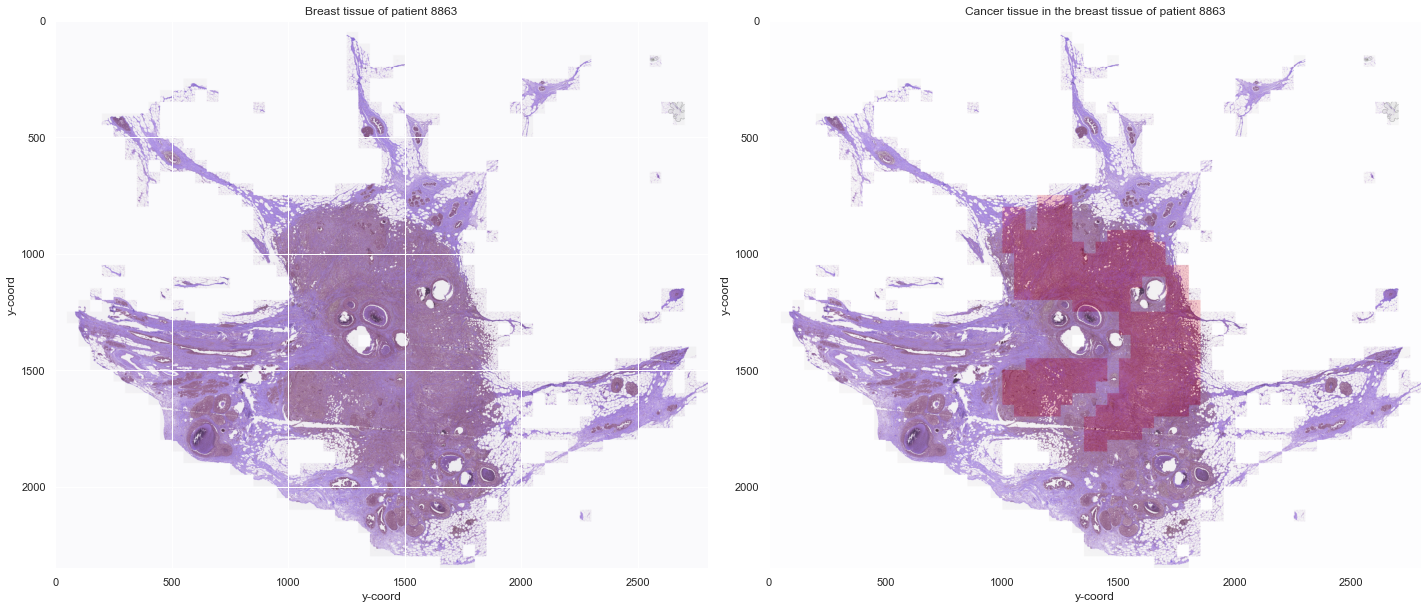

In [224]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
plt.gca().invert_yaxis()

ax[0].imshow(grid, alpha=0.8)
ax[0].set_xlabel("y-coord")
ax[0].set_ylabel("y-coord")
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.8)
ax[1].grid(False)
ax[1].set_xlabel("y-coord")
ax[1].set_ylabel("y-coord")
#ax.set_ylim(bottom=0)
#ax[1].set_ylim(bottom=0)

ax[0].set_title("Breast tissue of patient 8863")
ax[1].set_title("Cancer tissue in the breast tissue of patient 8863")

In [13]:
data = glob('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/archive/**/*.png', recursive=True)



277524


In [ ]:
We've worked with DataFrames so far, though, this was all without images - we only stored their paths in case we want to retrieve and plot them.
One way to load images is to simply iterate through the data and load them in:

In [199]:
df_0 = pd.DataFrame()
idxNumber = 0
for path in data:
    split = path.split('_')
    # Extract elements 2 and 3, substringing the first char
    patient_id = split[7].split('/')[-1]
    x_coord = split[9][1:]
    y_coord = split[10][1:]
    idc_class = split[11][5]
    
    df_data = {"idc_class": [idc_class],
               "patient_id": [patient_id],
               "x_coord": [x_coord],
               "y_coord": [y_coord],
               "path": [path],
               "index": [idxNumber]}
    idxNumber += 1
    data_df = pd.DataFrame(df_data)
    df_0 = pd.concat([df_0, data_df])
    df = df_0.set_index("index")

KeyboardInterrupt: 

In [46]:
df = df_0.set_index("index")

In [186]:
df['patient_id'] = df['patient_id'].astype('int')
df['x_coord'] = df['x_coord'].astype('int')
df['y_coord'] = df['y_coord'].astype('int')
df['idc_class'] = df['idc_class'].astype('int')

In [ ]:
Here I create directories to save my dataframe, in order not to run it every time because it takes a lot of time

In [48]:
os.makedirs('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame', exist_ok=True)
df.to_csv('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame/all.csv') 



In [ ]:
We're creating a truncated dataset to test out the models on smaller sets for efficiency's sake. 
You're free to use the entirety of the dataset, 
but be prepared to wait a long time before you can benchmark them.
Once the benchmarking is done on smaller datasets, 
we can load in the entirety of the images.

In [14]:
path = '/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/DataFrame/all.csv'
df = pd.read_csv(path)

In [15]:
df = df.set_index("index")

In [16]:
df

,idc_class,patient_id,x_coord,y_coord,path
index,,,,,
0,0,9036,1051,2401,/Users/carolina/Documents/Semester_8/Introduct...
1,0,9036,2951,951,/Users/carolina/Documents/Semester_8/Introduct...
2,0,9036,3001,1451,/Users/carolina/Documents/Semester_8/Introduct...
3,0,9036,3051,801,/Users/carolina/Documents/Semester_8/Introduct...
4,0,9036,951,1901,/Users/carolina/Documents/Semester_8/Introduct...
...,...,...,...,...,...
277519,1,8957,1951,701,/Users/carolina/Documents/Semester_8/Introduct...
277520,1,8957,2051,551,/Users/carolina/Documents/Semester_8/Introduct...
277521,1,8957,1951,651,/Users/carolina/Documents/Semester_8/Introduct...


Text(0.5, 1.0, 'How many patches do we have per patient?')

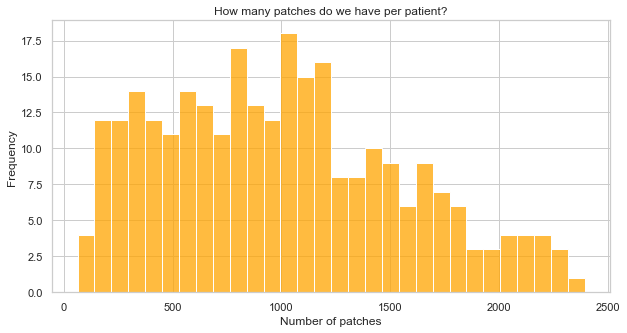

In [187]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(df.groupby("patient_id").size(), color="Orange", kde=False, bins=30)
ax.set_xlabel("Number of patches")
ax.set_ylabel("Frequency")
ax.set_title("How many patches do we have per patient?")

Text(0.5, 1.0, 'Count of each category')

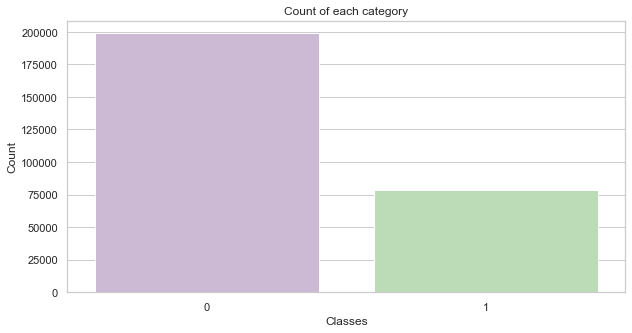

In [188]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data = df, x ="idc_class", palette='PRGn', ax=ax);
ax.set_ylabel("Count")
ax.set_xlabel("Classes")
ax.set_title("Count of each category")

In [33]:
shuffled = df.iloc[permutation(df.index)]
print(shuffled.head())

        idc_class  patient_id  x_coord  y_coord  \
index                                             
68526           1        9126     2051     1051   
229351          1       14305     1301      651   
121798          0        9228     1201     1951   
60330           0        9322     1801      651   
164574          0       13687     1351      551   

                                                     path  
index                                                      
68526   /Users/carolina/Documents/Semester_8/Introduct...  
229351  /Users/carolina/Documents/Semester_8/Introduct...  
121798  /Users/carolina/Documents/Semester_8/Introduct...  
60330   /Users/carolina/Documents/Semester_8/Introduct...  
164574  /Users/carolina/Documents/Semester_8/Introduct...  


In [34]:
x = []
y = []

# Loading in 1000 images
for i in shuffled["path"][:1000]:
    if i.endswith('.png'):
        label=i[-5]
        img = cv2.imread(i)
        # Transformation steps, such as resizing
        img = cv2.resize(img,(200,200))
        x.append(img)
        y.append(label)

In [35]:
x = np.array(x, dtype='float16')
y = np.array(y, dtype='float16')


X_train, X_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.3)

In [38]:
if not os.path.exists('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/'):
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/')

    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/')

    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/0/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/1/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/0/')
    os.mkdir('/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/1/')
    
    
    

In [55]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [ ]:
Now, let's iterate over the length of the dataset, in large steps, and use the steps as the starting and ending indices for our data list, 
loading the associated images in, reshaping them, and saving them in the appropriate folder:

In [ ]:
for batch_num, indices in enumerate(range(1000, int(len(df)/10), 1000), 1):
    x = []
    y = []
    
    for i in df["path"][indices-1000:indices]:
        if i.endswith('.png'):
            label=i[-5]
            img = cv2.imread(i)
            img = cv2.resize(img,(100,100))
            x.append(img)
            y.append(label)
        
    x = np.array(x, dtype='float32')
    y = np.array(y, dtype='float32')
    
    X_train, X_test, y_train, y_test = train_test_split(x,y, shuffle=True, test_size=0.2)
    
    for index, img in enumerate(X_train):
        random_value = tf.random.uniform(())
        if random_value > 0.5 and random_value < 0.65:
            img = tf.image.flip_left_right(img).numpy()
        if random_value > 0.6 and random_value < 0.75:
            img = tf.image.flip_up_down(img).numpy()
        cv2.imwrite(f"/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/{int(y_train[index])}/batch{batch_num}_sample{index}.png", img.astype('int'))
    
    for index, img in enumerate(X_test):
        cv2.imwrite(f"/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/{int(y_test[index])}/batch{batch_num}_sample{index}.png", img.astype('int'))
        
        
        
        

Processing batch 1 taking images from 0 to 1000
Processing batch 2 taking images from 1000 to 2000
Processing batch 3 taking images from 2000 to 3000
Processing batch 4 taking images from 3000 to 4000
Processing batch 5 taking images from 4000 to 5000
Processing batch 6 taking images from 5000 to 6000
Processing batch 7 taking images from 6000 to 7000
Processing batch 8 taking images from 7000 to 8000
Processing batch 9 taking images from 8000 to 9000
Processing batch 10 taking images from 9000 to 10000
Processing batch 11 taking images from 10000 to 11000
Processing batch 12 taking images from 11000 to 12000
Processing batch 13 taking images from 12000 to 13000
Processing batch 14 taking images from 13000 to 14000
Processing batch 15 taking images from 14000 to 15000
Processing batch 16 taking images from 15000 to 16000
Processing batch 17 taking images from 16000 to 17000
Processing batch 18 taking images from 17000 to 18000
Processing batch 19 taking images from 18000 to 19000
Proce

In [256]:

path_list = glob("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/train/**/*.png")

trainingData_x = []
trainingData_y = []

for path in path_list:
    if path.endswith('.png'):
        label = int(path.split('/')[-2])
        img = cv2.imread(path)
        img = cv2.resize(img,(200,200))
        trainingData_x.append(img)
        trainingData_y.append(label)

trainingData_x = np.array(trainingData_x, dtype='float32')
trainingData_y = np.array(trainingData_y, dtype='float32')

X_train, X_valid, y_train, y_valid = train_test_split(trainingData_x, trainingData_y, shuffle=True, test_size=0.1, random_state=42)

X_train = np.array(X_train, dtype='float32')
X_valid = np.array(X_valid, dtype='float32')

path_list = glob("/Users/carolina/Documents/Semester_8/Introduction_to_Machine_Learning_and_Data_Mining/Project/hist_images_truncated/test/**/*.png")

testData_x = []
testData_y = []

for path in path_list:
    if path.endswith('.png'):
        label = int(path.split('/')[-2])
        img = cv2.imread(path)
        img = cv2.resize(img,(200,200))
        testData_x.append(img)
        testData_y.append(label)

X_test = np.array(testData_x, dtype='float32')
y_test = np.array(testData_y, dtype='float32')






Text(0.5, 1.0, 'Test data')

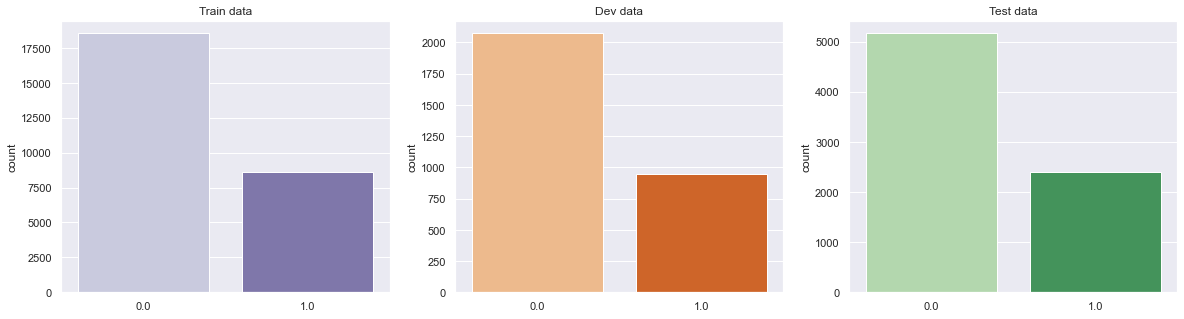

In [216]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.countplot(x = y_train, ax=ax[0], palette="Purples")
ax[0].set_title("Train data")
sns.countplot(x = y_valid, ax=ax[1], palette="Oranges")
ax[1].set_title("Dev data")
sns.countplot(x= y_test, ax=ax[2], palette="Greens")
ax[2].set_title("Test data")

In [ ]:
First, we raise an issue here. Is our class imbalanced?
Given the fact that negative samples are much more numerous than positive ones 
- our test set will also have a lot of negative samples. 
Since there's 277524 samples in total, 198738 of which are negative - that's ~71% class 0 samples.

In conclusion: accuracy is not a good metric to use when you have class imbalance.

In [ ]:
Accuracy is a metric for classification models that measures the number of predictions that are correct
as a percentage of the total number of predictions that are made. 
As an example, if 90% of your predictions are correct, your accuracy is simply 90%.

Accuracy is a useful metric only when you have an equal distribution of classes on your classification.
This means that if you have a use case in which you observe more data points of one class than of another,
the accuracy is not a useful metric anymore.

But how to fix this issue?

There are different ways like for example:
    1. undersampling
    2. oversampling
    3. SMOTE data augumentation
    4. better accuracy metrics


In [ ]:
The F1 score: combining Precision and Recall
    
Precision and Recall are the two building blocks of the F1 score.
The goal of the F1 score is to combine the precision and recall metrics into a single metric. 
At the same time, the F1 score has been designed to work well on imbalanced data.
Another definition for F1 score is the harmonic mean of precision and recall.
 
F1=(2∗Precision∗Recall)/(Precision+Recall)

In [ ]:
Now we will try 3 different models of CNN, chosen from our research online, to be the best and most used
with Image Classification problem, but we will use also f1 as a metric too while running the CNN since our
classes are imbalanced.

In [ ]:
First that we will try is EfficientNet which is a convolutional neural network architecture and scaling method that 
uniformly scales all dimensions of depth/width/resolution using a compound coefficient.

In [ ]:
With the custom CNN baseline checked, let's see if we can utilize some of the pre-existing
architectures to boost the performance. 
These architectures have specialized building blocks and will typically perform better 
than a solution as simple as the one laid out in the previous section.
Keras comes with a bunch of built-in models, both pre-trained and empty!

In [ ]:
The EfficientNet family, spanning from B0 to B7 is an efficiently-scaling, highly-performant family of models.
Alongside some other architectures, it's consistently ranked in the top performant models in most benchmarks. 
There's a high probability that it will perform on this task well, so let's start out with EfficientNetB0!

In [ ]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)
    
    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    
    return K.mean(f1)




In [ ]:
def f1_loss(y_true, y_pred):
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    
    return 1 - K.mean(f1)




In [59]:
model_efficientNetB0 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_efficientNetB0.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization_3 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_3   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 1280)              0         
                                                                 
 flatten_3 (Flatten)         (None, 1280)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

In [207]:
callbacks = [tf.keras.callbacks.EarlyStopping(patience=5),
             tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0.h5', save_best_only=True)]

model_efficientNetB0.compile(loss="binary_crossentropy",
                             optimizer='adam',
                             metrics=[f1,
                                      keras.metrics.BinaryAccuracy(),
                                      keras.metrics.Precision(),
                                      keras.metrics.Recall(),
                                      keras.metrics.AUC()])

history_efficientNetB0 = model_efficientNetB0.fit(X_train, y_train,
                                    validation_data = (X_valid, y_valid),
                                    callbacks = callbacks,
                                    epochs = 15)

model_efficientNetB0.save('model_efficientNetB0.h5')




Epoch 1/15
849/849 [==============================] - 2511s 3s/step - loss: 0.2742 - f1: 0.8219 - binary_accuracy: 0.8918 - precision_7: 0.8368 - recall_9: 0.8184 - auc_9: 0.9464 - val_loss: 0.2516 - val_f1: 0.8357 - val_binary_accuracy: 0.8869 - val_precision_7: 0.7572 - val_recall_9: 0.9407 - val_auc_9: 0.9715
Epoch 2/15
849/849 [==============================] - 2394s 3s/step - loss: 0.2060 - f1: 0.8628 - binary_accuracy: 0.9169 - precision_7: 0.8701 - recall_9: 0.8672 - auc_9: 0.9697 - val_loss: 0.2399 - val_f1: 0.8306 - val_binary_accuracy: 0.9062 - val_precision_7: 0.9037 - val_recall_9: 0.7841 - val_auc_9: 0.9671
Epoch 3/15
849/849 [==============================] - 2409s 3s/step - loss: 0.1597 - f1: 0.8937 - binary_accuracy: 0.9362 - precision_7: 0.9038 - recall_9: 0.8937 - auc_9: 0.9816 - val_loss: 0.1713 - val_f1: 0.8936 - val_binary_accuracy: 0.9353 - val_precision_7: 0.8819 - val_recall_9: 0.9164 - val_auc_9: 0.9801
Epoch 4/15
849/849 [==============================] - 2431

In [ ]:
model_efficientNetB0 = tf.keras.models.load_model("model_efficientNetB0.h5")

In [61]:
losse_efficientNetB0 = pd.DataFrame(model_efficientNetB0.history.history)
losse_efficientNetB0

,loss,binary_accuracy,precision_2,recall_2,auc_2,val_loss,val_binary_accuracy,val_precision_2,val_recall_2,val_auc_2
0,0.342473,0.857407,0.599162,0.868421,0.931512,0.500376,0.779861,0.472989,0.960327,0.954729


Text(0.5, 1.0, 'auc analysis')

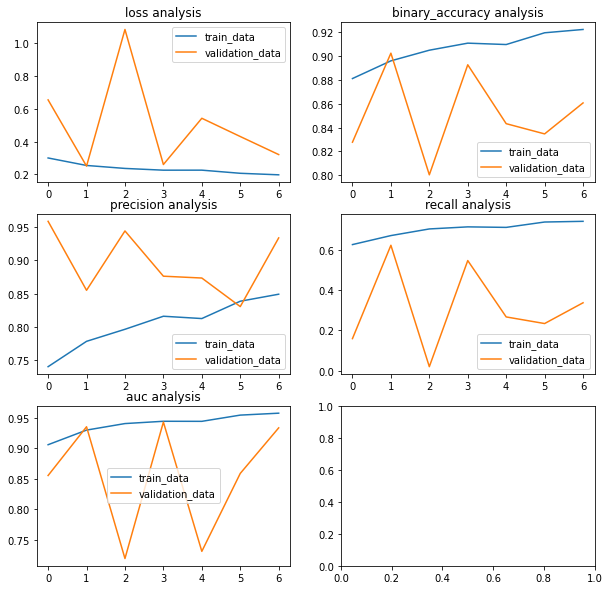

In [39]:
fig, ax = plt.subplots(3, 2, figsize=(10,10))
ax[0,0].plot(losse_efficientNetB0["loss"])
ax[0,0].plot(losse_efficientNetB0["val_loss"])
ax[0,0].legend(['train_data','validation_data'], loc='upper left')
ax[0,0].set_title('loss analysis')

ax[0,1].plot(losse_efficientNetB0["binary_accuracy"])
ax[0,1].plot(losse_efficientNetB0["val_binary_accuracy"])
ax[0,1].legend(['train_data','validation_data'], loc='upper left')
ax[0,1].set_title('binary_accuracy analysis')

ax[1,0].plot(losse_efficientNetB0["precision_4"])
ax[1,0].plot(losse_efficientNetB0["val_precision_4"])
ax[1,0].legend(['train_data','validation_data'], loc='upper left')
ax[1,0].set_title('precision analysis')

ax[1,1].plot(losse_efficientNetB0["recall_4"])
ax[1,1].plot(losse_efficientNetB0["val_recall_4"])
ax[1,1].legend(['train_data','validation_data'], loc='upper left')
ax[1,1].set_title('recall analysis')

ax[2,0].plot(losse_efficientNetB0["auc_4"])
ax[2,0].plot(losse_efficientNetB0["val_auc_4"])
ax[2,0].legend(['train_data','validation_data'], loc='upper left')
ax[2,0].set_title('auc analysis')

# ax[2,1].plot(losse_efficientNetB0["f1"])
# ax[2,1].plot(losse_efficientNetB0["val_f1"])
# ax[2,1].legend(['train_data','validation_data'], loc='upper left')
# ax[2,1].set_title('fit analysis')

In [ ]:
Now, after running the cnn without using f1 as a metric or as a loss function, let's try it with these matrics.

In [62]:
model_effNetB0_f1 = keras.models.Sequential([
    keras.applications.EfficientNetB0(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.BatchNormalization(),
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_effNetB0_f1.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 1280)       5120      
 hNormalization)                                                 
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_4 (Dropout)         (None, 1280)              0         
                                                                 
 flatten_4 (Flatten)         (None, 1280)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [64]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_effnetb0_f1_loss.h5', save_best_only=True, monitor="f1_val")]

model_effNetB0_f1.compile(loss=f1_loss,
                          optimizer='adam',
                          metrics=[f1,
                                   keras.metrics.BinaryAccuracy(),
                                   keras.metrics.Precision(),
                                   keras.metrics.Recall(),
                                   keras.metrics.AUC()])

history_effNetB0_f1 = model_effNetB0_f1.fit(X_train, y_train,
                                            validation_data=(X_valid, y_valid),
                                            callbacks=callbacks,
                                            epochs=15)

model_effNetB0_f1.save('model_efficientNetB0_f1.h5')



Epoch 1/15
849/849 [==============================] - 2859s 3s/step - loss: 0.3052 - f1: 0.6917 - binary_accuracy: 0.7992 - precision_3: 0.6637 - recall_4: 0.7426 - auc_4: 0.7906 - val_loss: 0.2733 - val_f1: 0.7294 - val_binary_accuracy: 0.8243 - val_precision_3: 0.6945 - val_recall_4: 0.7841 - val_auc_4: 0.8138
Epoch 2/15
849/849 [==============================] - 2754s 3s/step - loss: 0.3349 - f1: 0.6598 - binary_accuracy: 0.7740 - precision_3: 0.6233 - recall_4: 0.7256 - auc_4: 0.7618 - val_loss: 0.2557 - val_f1: 0.7463 - val_binary_accuracy: 0.8326 - val_precision_3: 0.6993 - val_recall_4: 0.8169 - val_auc_4: 0.8290
Epoch 3/15
849/849 [==============================] - 2902s 3s/step - loss: 0.3245 - f1: 0.6717 - binary_accuracy: 0.7747 - precision_3: 0.6174 - recall_4: 0.7601 - auc_4: 0.7728 - val_loss: 0.3122 - val_f1: 0.6904 - val_binary_accuracy: 0.8107 - val_precision_3: 0.6989 - val_recall_4: 0.6952 - val_auc_4: 0.8140
Epoch 4/15
849/849 [==============================] - 2892

In [ ]:
model_effNetB0_f1 = tf.keras.models.load_model("model_efficientNetB0_f1.h5")

In [ ]:
losse_effNetB0_f1 = pd.DataFrame(model_effNetB0_f1.history.history)
losse_effNetB0_f1

Text(0.5, 1.0, 'F1-score')

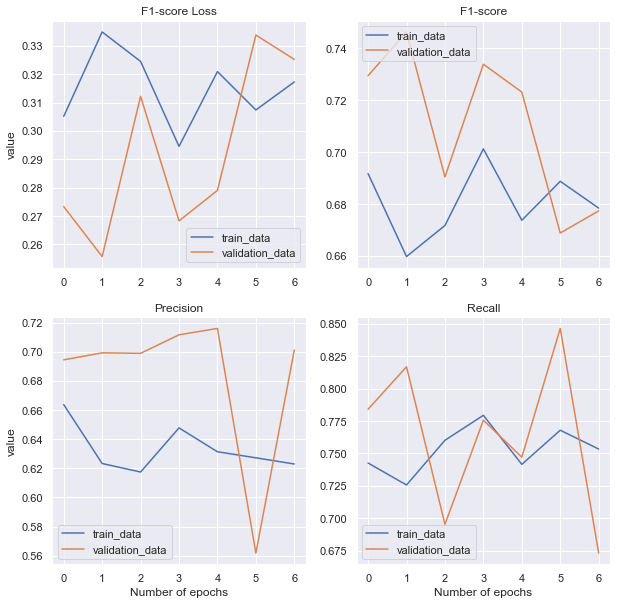

In [220]:
sns.set_theme()
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].plot(losse_effNetB0_f1["loss"])
ax[0,0].plot(losse_effNetB0_f1["val_loss"])
ax[0,0].legend(['train_data','validation_data'], loc='lower right')
ax[0,0].set_title('F1-score Loss')
ax[0,0].set_ylabel("value")

#ax[0,1].plot(losse_effNetB0_f1["binary_accuracy"])
#ax[0,1].plot(losse_effNetB0_f1["val_binary_accuracy"])
#ax[0,1].legend(['train_data','validation_data'], loc='upper left')
#ax[0,1].set_title('binary_accuracy analysis')

ax[1,0].plot(losse_effNetB0_f1["precision_3"])
ax[1,0].plot(losse_effNetB0_f1["val_precision_3"])
ax[1,0].legend(['train_data','validation_data'], loc='lower left')
ax[1,0].set_title('Precision')
ax[1,0].set_xlabel("Number of epochs")
ax[1,0].set_ylabel("value")


ax[1,1].plot(losse_effNetB0_f1["recall_4"])
ax[1,1].plot(losse_effNetB0_f1["val_recall_4"])
ax[1,1].legend(['train_data','validation_data'], loc='lower left')
ax[1,1].set_title('Recall')
ax[1,1].set_xlabel("Number of epochs")

#ax[2,0].plot(losse_effNetB0_f1["auc_4"])
#ax[2,0].plot(losse_effNetB0_f1["val_auc_4"])
#ax[2,0].legend(['train_data','validation_data'], loc='upper left')
#ax[2,0].set_title('auc analysis')

ax[0,1].plot(losse_effNetB0_f1["f1"])
ax[0,1].plot(losse_effNetB0_f1["val_f1"])
ax[0,1].legend(['train_data','validation_data'], loc='upper left')
ax[0,1].set_title('F1-score')

In [74]:
evaluation_effNetB0_f1 = model_effNetB0_f1.evaluate(X_test, y_test)

236/236 [==============================] - 168s 707ms/step - loss: 0.7388 - f1: 0.2612 - binary_accuracy: 0.8265 - precision_3: 0.7374 - recall_4: 0.7015 - auc_4: 0.7932


In [86]:
pred_effNetB0 = model_effNetB0_f1.predict(X_test)

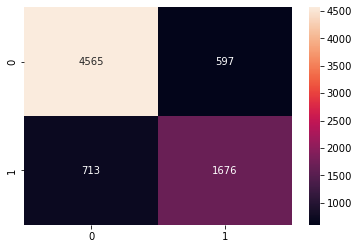

In [88]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = K.round(pred_effNetB0)), annot=True, fmt='g')
plt.show()

In [65]:
model_resnet = keras.models.Sequential([
    keras.applications.ResNet50(input_shape=(200,200,3), weights='imagenet', include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_resnet.summary()



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_10 (Dense)            (None, 128)               262272    
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23,850,113
Trainable params: 23,796,993
Non-trainable params: 53,120
_________________________________________________________________


In [66]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_resnet50.h5',  save_best_only=True, monitor="f1_val")]

model_resnet.compile(loss=f1_loss,
              optimizer='adam',
              metrics=[f1,
                  keras.metrics.BinaryAccuracy(),
                  keras.metrics.Precision(),
                  keras.metrics.Recall(),
                  keras.metrics.AUC()
              ])

history_resnet = model_resnet.fit(X_train, y_train,
                     validation_data=(X_valid, y_valid),
                     callbacks=callbacks,
                     epochs=15)

model_resnet.save('model_resnet.h5')



Epoch 1/15
849/849 [==============================] - 5730s 7s/step - loss: 0.3064 - f1: 0.6948 - binary_accuracy: 0.7956 - precision_4: 0.6519 - recall_5: 0.7618 - auc_5: 0.8128 - val_loss: 0.8416 - val_f1: 0.1651 - val_binary_accuracy: 0.7052 - val_precision_4: 0.7121 - val_recall_5: 0.0995 - val_auc_5: 0.5589
Epoch 2/15
849/849 [==============================] - 5340s 6s/step - loss: 0.2712 - f1: 0.7291 - binary_accuracy: 0.8232 - precision_4: 0.6967 - recall_5: 0.7828 - auc_5: 0.8337 - val_loss: 0.3319 - val_f1: 0.6669 - val_binary_accuracy: 0.8312 - val_precision_4: 0.8482 - val_recall_5: 0.5619 - val_auc_5: 0.7961
Epoch 3/15
849/849 [==============================] - 5263s 6s/step - loss: 0.2518 - f1: 0.7478 - binary_accuracy: 0.8308 - precision_4: 0.6997 - recall_5: 0.8168 - auc_5: 0.8508 - val_loss: 0.2685 - val_f1: 0.7348 - val_binary_accuracy: 0.8465 - val_precision_4: 0.7883 - val_recall_5: 0.6974 - val_auc_5: 0.8189
Epoch 4/15
849/849 [==============================] - 6402

In [ ]:
model_resnet = tf.keras.models.load_model("model_resnet.h5")

In [76]:
losse_resnet = pd.DataFrame(model_resnet.history.history)
losse_resnet

,loss,f1,binary_accuracy,precision_4,recall_5,auc_5,val_loss,val_f1,val_binary_accuracy,val_precision_4,val_recall_5,val_auc_5
0,0.306448,0.694755,0.795556,0.651875,0.761772,0.812806,0.841559,0.165136,0.705239,0.712121,0.099471,0.558918
1,0.271223,0.729149,0.823157,0.696709,0.782816,0.833662,0.331922,0.666872,0.831233,0.848243,0.561905,0.796073
2,0.251773,0.747833,0.830821,0.699701,0.816765,0.850831,0.268498,0.734756,0.846485,0.788278,0.697354,0.818939
3,0.245370,0.753876,0.840660,0.722644,0.806999,0.851333,0.623139,0.375910,0.727454,0.650367,0.281481,0.630862
4,0.245885,0.753638,0.842171,0.731851,0.792350,0.849693,0.480711,0.524908,0.787135,0.840449,0.395767,0.708436
5,0.245444,0.754783,0.846483,0.745055,0.783862,0.846435,0.385129,0.617517,0.754642,0.600196,0.649735,0.741603
6,0.240121,0.759462,0.846004,0.737232,0.798861,0.849590,0.728079,0.273861,0.730438,0.833333,0.174603,0.602810
7,0.257436,0.742302,0.842724,0.752359,0.750959,0.835291,0.714348,0.275986,0.735080,0.880208,0.178836,0.622454


Text(0.5, 1.0, 'F1-score')

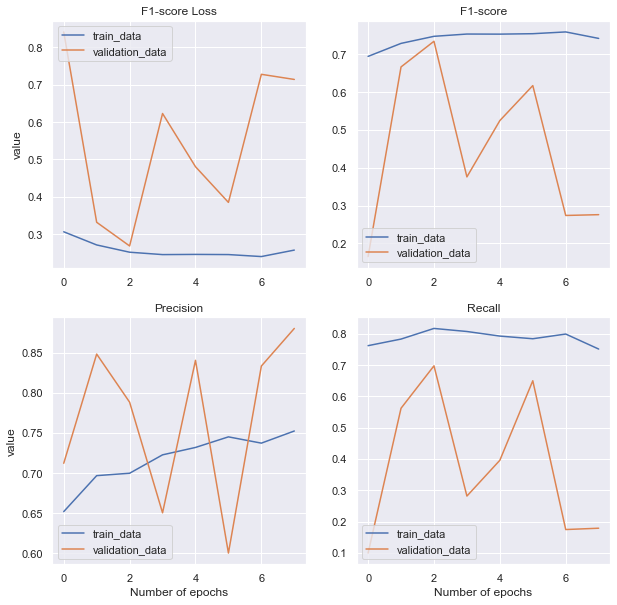

In [222]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].plot(losse_resnet["loss"])
ax[0,0].plot(losse_resnet["val_loss"])
ax[0,0].legend(['train_data','validation_data'], loc='upper left')
ax[0,0].set_title('F1-score Loss')
ax[0,0].set_ylabel("value")

#ax[0,1].plot(losse_resnet["binary_accuracy"])
#ax[0,1].plot(losse_resnet["val_binary_accuracy"])
#ax[0,1].legend(['train_data','validation_data'], loc='lower left')
#ax[0,1].set_title('binary_accuracy analysis')

ax[1,0].plot(losse_resnet["precision_4"])
ax[1,0].plot(losse_resnet["val_precision_4"])
ax[1,0].legend(['train_data','validation_data'], loc='lower left')
ax[1,0].set_title('Precision')
ax[1,0].set_xlabel("Number of epochs")
ax[1,0].set_ylabel("value")

ax[1,1].plot(losse_resnet["recall_5"])
ax[1,1].plot(losse_resnet["val_recall_5"])
ax[1,1].legend(['train_data','validation_data'], loc='lower left')
ax[1,1].set_title('Recall')
ax[1,1].set_xlabel("Number of epochs")

#ax[2,0].plot(losse_resnet["auc_5"])
#ax[2,0].plot(losse_resnet["val_auc_5"])
#ax[2,0].legend(['train_data','validation_data'], loc='lower left')
#ax[2,0].set_title('auc analysis')

ax[0,1].plot(losse_resnet["f1"])
ax[0,1].plot(losse_resnet["val_f1"])
ax[0,1].legend(['train_data','validation_data'], loc='lower left')
ax[0,1].set_title('F1-score')

In [84]:
evaluation_resnet = model_resnet.evaluate(X_test, y_test)

236/236 [==============================] - 349s 1s/step - loss: 0.9038 - f1: 0.0954 - binary_accuracy: 0.7290 - precision_4: 0.8317 - recall_5: 0.1800 - auc_5: 0.6184


In [87]:
pred_resnet = model_resnet.predict(X_test)

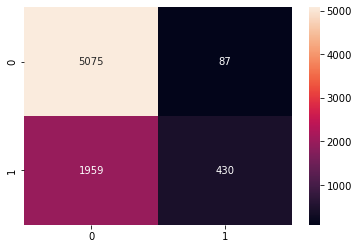

In [89]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = K.round(pred_resnet)), annot=True, fmt='g')
plt.show()

In [ ]:
Our next model would be a model whose author is the author of Keras itself. It is a high-performance architecture 
and it is called: "Google's Xception". We chose an architecture with which we haven't worked so far. 
Let's see how it will perform:

In [67]:
model_xception = keras.models.Sequential([
    keras.applications.Xception(input_shape=(200,200,3),weights='imagenet',include_top=False), 
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_xception.summary()



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_6   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_12 (Dense)            (None, 128)               262272    
                                                                 
 dense_13 (Dense)            (None, 1)                 129       
                                                                 
Total params: 21,123,881
Trainable params: 21,069,353
Non-trainable params: 54,528
_________________________________________________________________


In [68]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath='breast_cancer_xception.h5',  save_best_only=True, monitor="f1_val")]

model_xception.compile(loss=f1_loss,
                       optimizer='adam',
                       metrics=[f1,
                                keras.metrics.BinaryAccuracy(),
                                keras.metrics.Precision(),
                                keras.metrics.Recall(),
                                keras.metrics.AUC()])

history_xception = model_xception.fit(X_train, y_train,
                     validation_data=(X_valid, y_valid),
                     callbacks=callbacks,
                     epochs=15)

model_xception.save('model_xception.h5')



Epoch 1/15
849/849 [==============================] - 4665s 5s/step - loss: 0.3108 - f1: 0.6919 - binary_accuracy: 0.7961 - precision_5: 0.6532 - recall_6: 0.7600 - auc_6: 0.8107 - val_loss: 0.2856 - val_f1: 0.7160 - val_binary_accuracy: 0.8276 - val_precision_5: 0.7249 - val_recall_6: 0.7249 - val_auc_6: 0.8140
Epoch 2/15
849/849 [==============================] - 6150s 7s/step - loss: 0.2703 - f1: 0.7303 - binary_accuracy: 0.8248 - precision_5: 0.7003 - recall_6: 0.7817 - auc_6: 0.8291 - val_loss: 0.4197 - val_f1: 0.5849 - val_binary_accuracy: 0.7991 - val_precision_5: 0.8032 - val_recall_6: 0.4751 - val_auc_6: 0.7135
Epoch 3/15
849/849 [==============================] - 4566s 5s/step - loss: 0.2620 - f1: 0.7373 - binary_accuracy: 0.8278 - precision_5: 0.7027 - recall_6: 0.7915 - auc_6: 0.8272 - val_loss: 0.2898 - val_f1: 0.7124 - val_binary_accuracy: 0.8256 - val_precision_5: 0.7231 - val_recall_6: 0.7185 - val_auc_6: 0.7974
Epoch 4/15
849/849 [==============================] - 4583

In [ ]:
model_xception = tf.keras.models.load_model("model_xception.h5")

In [90]:
losse_xception = pd.DataFrame(model_xception.history.history)
losse_xception

,loss,f1,binary_accuracy,precision_5,recall_6,auc_6,val_loss,val_f1,val_binary_accuracy,val_precision_5,val_recall_6,val_auc_6
0,0.310791,0.691854,0.796072,0.653243,0.760028,0.810663,0.285637,0.715993,0.827586,0.724868,0.724868,0.813960
1,0.270304,0.730304,0.824778,0.700312,0.781653,0.829059,0.419711,0.584881,0.799072,0.803220,0.475132,0.713539
2,0.261998,0.737264,0.827763,0.702653,0.791536,0.827155,0.289760,0.712389,0.825597,0.723110,0.718518,0.797356
3,0.253690,0.745668,0.835722,0.717389,0.794791,0.832243,0.244782,0.755998,0.845159,0.731589,0.798942,0.842601
4,0.249433,0.750065,0.844898,0.748923,0.768166,0.830142,0.272412,0.729963,0.832891,0.725691,0.750265,0.818525
5,0.257492,0.742239,0.836128,0.728997,0.768748,0.823933,0.244778,0.758126,0.845159,0.730250,0.802116,0.835233
6,0.243350,0.755658,0.843277,0.730492,0.801070,0.839303,1.000000,0.000000,0.682361,0.000000,0.000000,0.495654
7,0.278726,0.720407,0.817519,0.690270,0.769562,0.808013,0.248070,0.753607,0.821286,0.655914,0.903704,0.844845
8,0.255949,0.744326,0.833069,0.712985,0.792233,0.825233,0.392571,0.610015,0.718501,0.537677,0.724868,0.724558
9,0.241840,0.757339,0.842761,0.729750,0.800256,0.833819,0.241814,0.760329,0.848475,0.742545,0.790476,0.833822


Text(0.5, 1.0, 'F1-score')

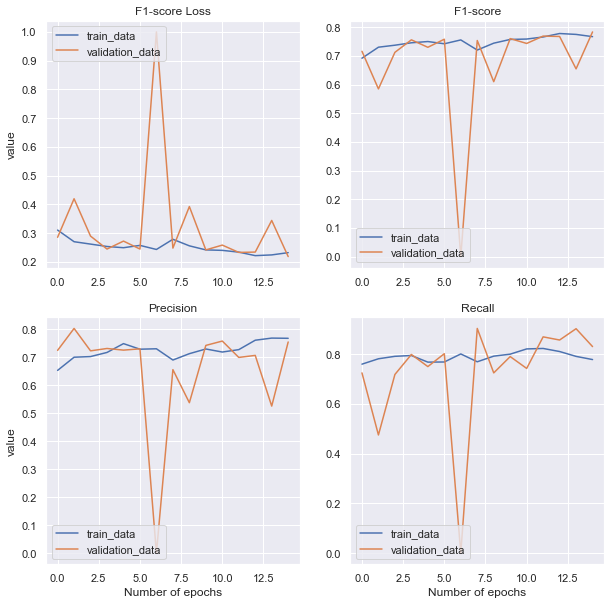

In [221]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0,0].plot(losse_xception["loss"])
ax[0,0].plot(losse_xception["val_loss"])
ax[0,0].legend(['train_data','validation_data'], loc='upper left')
ax[0,0].set_title('F1-score Loss')
ax[0,0].set_ylabel("value")

#ax[0,1].plot(losse_xception["binary_accuracy"])
#ax[0,1].plot(losse_xception["val_binary_accuracy"])
#ax[0,1].legend(['train_data','validation_data'], loc='lower left')
#ax[0,1].set_title('binary_accuracy analysis')

ax[1,0].plot(losse_xception["precision_5"])
ax[1,0].plot(losse_xception["val_precision_5"])
ax[1,0].legend(['train_data','validation_data'], loc='lower left')
ax[1,0].set_title('Precision')
ax[1,0].set_xlabel("Number of epochs")
ax[1,0].set_ylabel("value")

ax[1,1].plot(losse_xception["recall_6"])
ax[1,1].plot(losse_xception["val_recall_6"])
ax[1,1].legend(['train_data','validation_data'], loc='lower left')
ax[1,1].set_title('Recall')
ax[1,1].set_xlabel("Number of epochs")

#ax[2,0].plot(losse_xception["auc_6"])
#ax[2,0].plot(losse_xception["val_auc_6"])
#ax[2,0].legend(['train_data','validation_data'], loc='lower left')
#ax[2,0].set_title('auc analysis')

ax[0,1].plot(losse_xception["f1"])
ax[0,1].plot(losse_xception["val_f1"])
ax[0,1].legend(['train_data','validation_data'], loc='lower left')
ax[0,1].set_title('F1-score')

In [93]:
evaluation_xception = model_xception.evaluate(X_test, y_test)

236/236 [==============================] - 297s 1s/step - loss: 0.7101 - f1: 0.2898 - binary_accuracy: 0.8731 - precision_5: 0.7766 - recall_6: 0.8409 - auc_6: 0.8692


In [94]:
pred_xception = model_xception.predict(X_test)

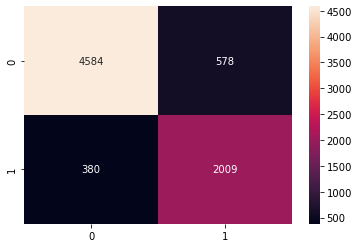

In [95]:
sns.heatmap(confusion_matrix(y_true = y_test, y_pred = K.round(pred_xception)), annot=True, fmt='g')
plt.show()

ValueError: num must be 1 <= num <= 25, not 26

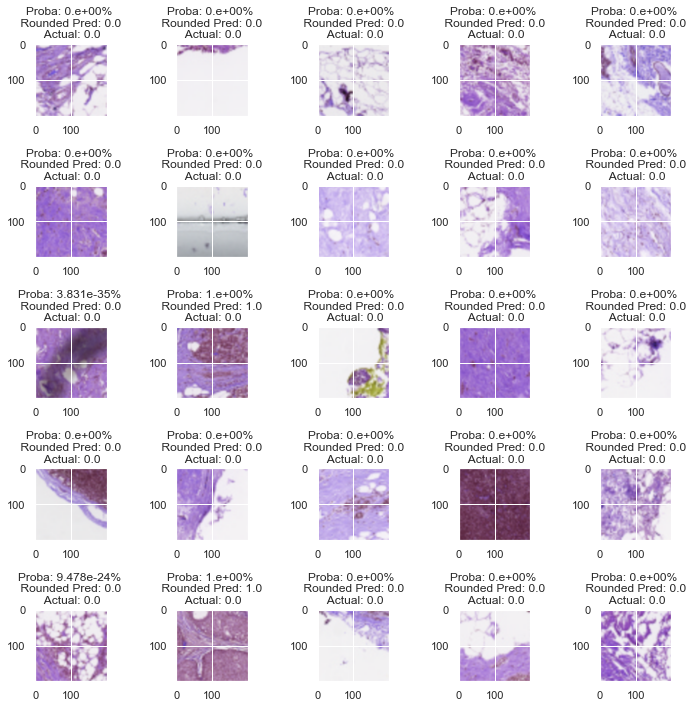

In [276]:
fig = plt.figure(figsize=(10,10))

images = X_test
labels = y_test

for index, image in enumerate(images):
    ax = fig.add_subplot(5,5,index+1)
    plt.imshow(image.astype('int'))
    
    image = np.expand_dims(image, 0)
    pred = model_xception.predict(image)
    pred = np.squeeze(pred)
    label = labels[index]
    
    ax.set_title(f'Proba: {np.format_float_scientific(pred, precision=3)}% \n Rounded Pred: {np.round(pred)} \n Actual: {label}')
    
    
plt.tight_layout()
plt.show()

In [ ]:
**Choosing The Best Model**

In [ ]:
How to choose?

We are interested in the model with the biggest recall but biggest precision also. Usually when one is big, 
the other one is small giving the recall-precision trade-off. Let's start evaluating.

In [96]:
effnet_recall, effnet_precision, effnet_f1, effnet_params = evaluation_effNetB0_f1[4], evaluation_effNetB0_f1[3], evaluation_effNetB0_f1[1], model_effNetB0_f1.count_params()
resnet_recall, resnet_precision, resnet_f1, resnet_params = evaluation_resnet[4], evaluation_resnet[3], evaluation_resnet[1], model_resnet.count_params()
xception_recall, xception_precision, xception_f1, xcecption_params = evaluation_xception[4], evaluation_xception[3], evaluation_xception[1], model_xception.count_params()

In [97]:
values = {
    'EffNetB0' : [effnet_recall, effnet_precision, effnet_f1],
    'ResNet50' : [resnet_recall, resnet_precision, resnet_f1],
    'Xception' : [xception_recall, xception_precision, xception_f1]}

In [101]:
df_performance = pd.DataFrame(values, index = ["Recall", "Precision", "F1-score"]).T

In [102]:
df_performance

,Recall,Precision,F1-score
EffNetB0,0.701549,0.737352,0.261238
ResNet50,0.179992,0.831721,0.095434
Xception,0.840938,0.776575,0.289783


In [ ]:
As we can see, in our case, EFfNetB0 and Xception are the ones that perform the best. Here we should make a choice
between higher precision or higher recall because EffNet has a higher recall while Xception has a higher Precision.
On the other side, from our previous knowledge we expected ResNet50 to perform much better than it actually does.
In our case Resnet perform very bad with very low Recall and Precision.

In [ ]:
Also, we will create a bar plot below in order for the values to be more visible and to be convinced for our choice.

In [208]:
import matplotlib.colors as mcolors
sns.set_theme(style="whitegrid", palette="Paired")

AxesSubplot(0.125,0.125;0.775x0.755)


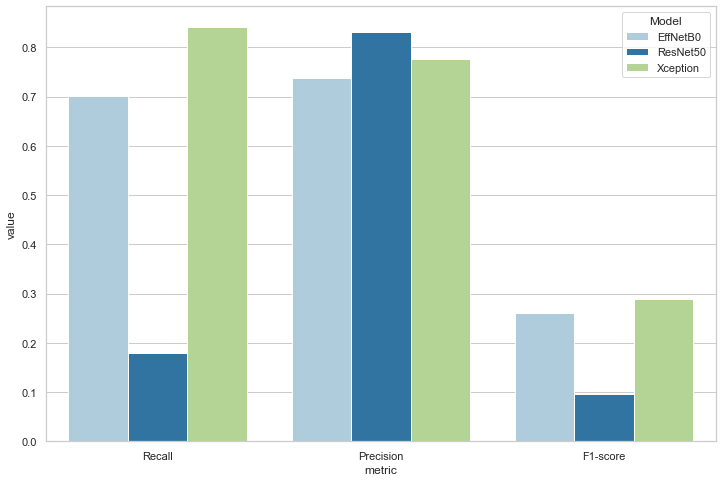

In [209]:
fig, ax = plt.subplots(figsize=(12, 8))

df_bar = df_performance.reset_index().melt(id_vars=["index"])
ax = sns.barplot(x="variable", y="value", hue="index", data=df_bar)
ax.set(xlabel='metric', ylabel='value')
plt.legend(title = "Model")
print(ax)



In [268]:
import keras_tuner as kt

In [269]:
def model_builder(hp):
    model = keras.Sequential([keras.applications.Xception(input_shape=(200,200,3),weights='imagenet',include_top=False), 
                              keras.layers.GlobalAveragePooling2D(),
                              keras.layers.Dense(hp.Int('units', min_value=16, max_value=256, step=32), 
                                                 activation=hp.Choice('activation', ['relu', 'swish'])),
                              keras.layers.Dense(1, activation='sigmoid')])
    
    model.compile(loss=f1_loss,
                  optimizer=hp.Choice('optimizer', ['adam', 'sgd', 'nadam']))

    return model



In [281]:
tuner = kt.RandomSearch(hypermodel = model_builder,
                        objective='val_loss',
                        max_trials=3b)
    
tuner.search(X_train, y_train, 
             validation_data=(X_valid, y_valid), 
             epochs=3)




Trial 5 Complete [04h 22m 47s]
val_loss: 0.22421184182167053

Best val_loss So Far: 0.22421184182167053
Total elapsed time: 04h 22m 47s
INFO:tensorflow:Oracle triggered exit


In [282]:
tuner.results_summary(num_)

Results summary
Results in ./untitled_project
Showing 10 best trials
Trial summary
Hyperparameters:
dropout: 0.1
units: 144
activation: relu
optimizer: nadam
Score: 0.22421184182167053
Trial summary
Hyperparameters:
dropout: 0.3
units: 176
activation: swish
optimizer: sgd
tuner/epochs: 1
tuner/initial_epoch: 0
tuner/bracket: 1
tuner/round: 0
Score: 0.2299339771270752
Trial summary
Hyperparameters:
dropout: 0.1
units: 48
activation: relu
optimizer: adam
Score: 0.24010488390922546
Trial summary
Hyperparameters:
dropout: 0.5
units: 144
activation: relu
optimizer: adam
Score: 0.2458706945180893
Trial summary
Hyperparameters:
dropout: 0.2
units: 80
activation: relu
optimizer: nadam
Score: 0.264676958322525


In [291]:
best_model = tuner.get_best_models(num_models=1)



In [296]:
tuner.get_best_hyperparameters()[0]



In [ ]:
References:

In [ ]:
https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images

https://www.kaggle.com/code/allunia/breast-cancer

https://www.kaggle.com/code/amerii/breast-cancer-classification-end-to-end

https://www.kaggle.com/code/rejpalcz/best-loss-function-for-f1-score-metric/notebook

In [ ]:
https://www.analyticsvidhya.com/blog/2020/08/top-4-pre-trained-models-for-image-classification-with-python-code/

https://theaisummer.com/cnn-architectures/

https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

https://builtin.com/data-science/precision-and-recall

https://medium.com/swlh/hyperparameter-tuning-in-keras-tensorflow-2-with-keras-tuner-randomsearch-hyperband-3e212647778f

https://www.tensorflow.org/tutorials/keras/keras_tuner
    
https://keras.io/guides/keras_tuner/getting_started/